# Multiple Linear Regression Analysis on Marketing Campaigns


## Introduction

Multiple linear regression helps us estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows us to compare more than one variable to the variable we're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this project, I will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. Previously I worked on finding a single variable that predicts sales, and now I'll expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, I'll conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders



## Step 1: Imports

### Importing packages

In [1]:
# Import libraries and modules.

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split


### Loading the dataset

In [2]:
# RUN THIS CELL TO IMPORT THE DATA.
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
data.head(5)


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarizing with the data's features

Starting with an exploratory data analysis to get familiar with the data and preparing it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Some reasons for conducting an EDA before constructing a simple linear regression model:** 


* Understanding which variables are present in the data
* Reviewing the distribution of features, such as minimum, mean, and maximum values
* Plotting the relationship between the independent and dependent variables to visualize which features have a linear relationship
* Identifying issues with the data, such as incorrect values (e.g., typos) or missing values

### Creating a pairplot of the data

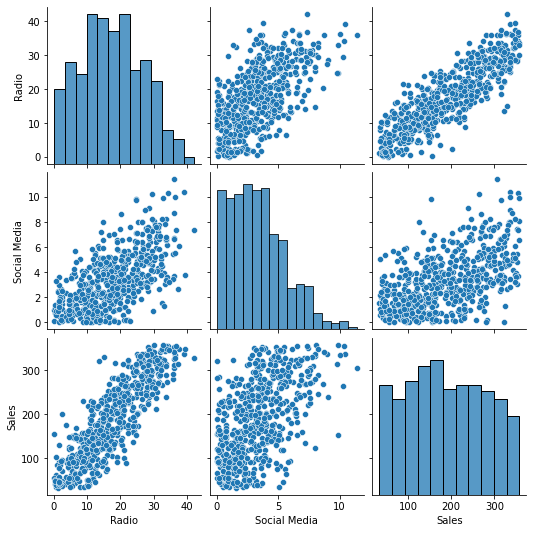

In [3]:
# Create a pairplot of the data.

sns.pairplot(data)



`Radio` and `Social Media` both appear to have linear relationships with `Sales`. Given this, `Radio` and `Social Media` may be useful as independent variables in a multiple linear regression model estimating `Sales`. 

`TV` and `Influencer` are excluded from the pairplot because they are not numeric. 

### Calculating the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, I'll find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [4]:
# Calculate the mean sales for each TV category. 

mean_sales_tv=data.groupby('TV')['Sales'].mean()


# Calculate the mean sales for each Influencer category. 

mean_sales_influencer=data.groupby('Influencer')['Sales'].mean()

print(mean_sales_tv ,mean_sales_influencer)


TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64 Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64



The average `Sales` for `High` `TV` promotions is considerably higher than for `Medium` and `Low` `TV` promotions. `TV` may be a strong predictor of `Sales`.

The categories for `Influencer` have different average `Sales`, but the variation is not substantial. `Influencer` may be a weak predictor of `Sales`.

These results can be investigated further when fitting the multiple linear regression model. 

### Remove missing data

This dataset contains rows with missing values. To correct this, I'll drop all rows that contain missing data.

In [5]:
# Drop rows that contain missing data and update the DataFrame.

data=data.dropna(axis=0)


### Clean column names

The `ols()` function doesn't run when variable names contain a space. I'll check that the column names in `data` do not contain spaces and fix them, if needed.

In [6]:
# Rename all columns in data that contain a space. 

print(data.columns.str.contains(' '))
print(data.columns[2])
data.rename(columns={'Social Media':'Social_Media'},inplace=True)
data.head(5)

[False False  True False False]
Social Media


,TV,Radio,Social_Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 3: Model building

### Fitting a multiple linear regression model that predicts sales

In [11]:
# Define the OLS formula.

ols_formula= "Sales ~ C(TV) + Radio"

# Defin ols_data.

# Subset X and y variables
data_x = data[['TV','Radio']]
data_y = data[['Sales']]

data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)
ols_data= pd.concat([data_x_train, data_y_train], axis=1)

# Create an OLS model.

OLS=ols(formula=ols_formula, data=ols_data)

# Fit the model.

model= OLS.fit()

# Save the results summary.

summary=model.summary()

# Display the model results.

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1240.
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          7.29e-201
Time:                        14:36:37   Log-Likelihood:                -1897.3
No. Observations:                 400   AIC:                             3803.
Df Residuals:                     396   BIC:                             3818.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         214.4941      7.726     27.763      0.000     199.305     229.683
C(TV)[T.Low]     -148.2727      6.119    -24.232      0.000    -160.302    -136.243
C(TV)[T.Medium]   -70.3024      4.499    -15.627      0.000     -79.147     -61.458
Radio               3.0084      0.254     11.858      0.000       2.510       3.507
==============================================================================
Omnibus:                       46.505   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.393
Skew:                           0.047   Prob(JB):                      0.00123
Kurtosis:                       2.109   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Which independent variables did you choose for the model, and why?




* `TV` was selected, as the preceding analysis showed a strong relationship between the `TV` promotional budget and the average `Sales`.
* `Radio` was selected because the pairplot showed a strong linear relationship between `Radio` and `Sales`.
* `Social Media` was not selected because it's violating the linearity assumption from the previous pair plot.
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the preceding analysis.

### Checking model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 


### Model assumption: Linearity

I'll create scatterplots comparing the continuous independent variable(s) that I selected previously with `Sales` to check the linearity assumption. 

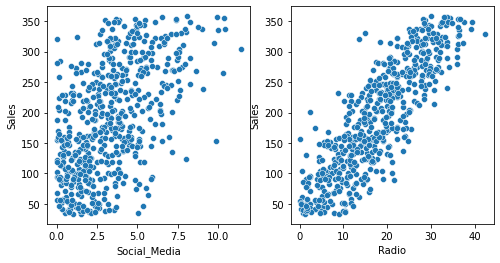

In [12]:
# Create a scatterplot for each independent variable and the dependent variable.

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.scatterplot(data['Social_Media'], data['Sales'],ax=axes[0])
sns.scatterplot(data['Radio'], data['Sales'],ax=axes[1])
plt.show()


The linearity assumption holds for `Radio`, as there is a clear linear relationship in the scatterplot between `Radio` and `Sales`. `Social Media`as noticed before in the pair plot it doesn't have a linear relationship with `Sales` so I didn't choose it for the model.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

I'll create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

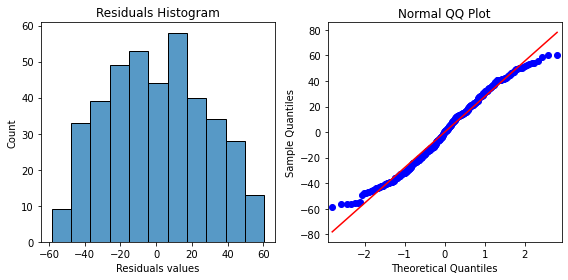

In [13]:
# Calculate the residuals.

residuals=model.resid

# Create a histogram with the residuals. 
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals,ax=axes[0])
axes[0].set_title("Residuals Histogram")

axes[0].set_xlabel('Residuals values')

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals,line='s',ax=axes[1])
axes[1].set_title("Normal QQ Plot")
plt.tight_layout()



The normality assumption met, The residuals are roughly normally distributed in the histogram, and the Q-Q plot form a straight line.

### Model assumption: Constant variance  `Homoscedasticity`

I'll check that the **Homoscedasticity assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

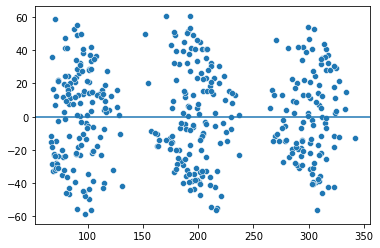

In [14]:
# Create a scatterplot with the fitted values from the model and the residuals.

fitted_values=model.fittedvalues
fig=sns.scatterplot(fitted_values, residuals)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)



There is a pattern of 3 groups because the categorical variable is dominateing in this model, meaning that the `TV` is the biggest factor decides the sales. However, the variance of the residuals is similarly distributed validation that the assumption of homoscedasticity is met.

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

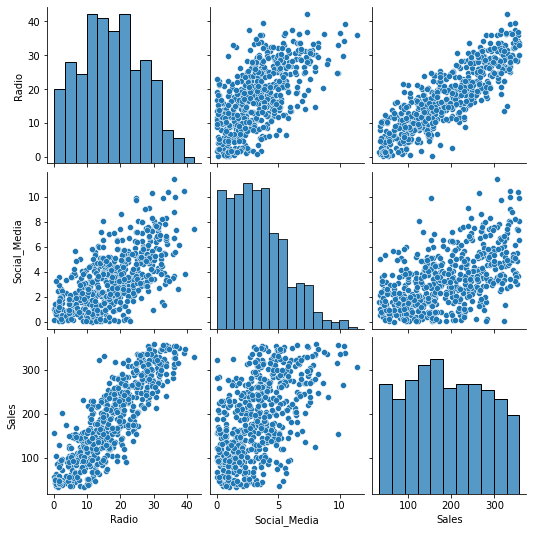

In [15]:
# Create a pairplot of the data.

sns.pairplot(data)


In [16]:
# Calculate the variance inflation factor.

# Import variance_inflation_factor from statsmodels.

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a subset of the data with the continous independent variables. 

x=data[['Social_Media','Radio']]

# Calculate the variance inflation factor for each variable.

vif=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
# vif=zip(x,vif)
# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=x.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Social_Media,5.170922
Radio,5.170922



The preceding model only has one continous independent variable, meaning there are no multicollinearity issues. 

If a model used both `Radio` and `Social_Media` as predictors, there would be a moderate linear relationship between `Radio` and `Social_Media` that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both `Radio` and `Social_Media` are included in the model is 5.17 for each variable, indicating high multicollinearity.


## Step 4: Results and evaluation

### Displaying the OLS regression results

In [17]:
# Display the model results summary.

summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1240.
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          7.29e-201
Time:                        14:36:37   Log-Likelihood:                -1897.3
No. Observations:                 400   AIC:                             3803.
Df Residuals:                     396   BIC:                             3818.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         214.4941      7.726     27.763      0.000     199.305     229.683
C(TV)[T.Low]     -148.2727      6.119    -24.232      0.000    -160.302    -136.243
C(TV)[T.Medium]   -70.3024      4.499    -15.627      0.000     -79.147     -61.458
Radio               3.0084      0.254     11.858      0.000       2.510       3.507
==============================================================================
Omnibus:                       46.505   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.393
Skew:                           0.047   Prob(JB):                      0.00123
Kurtosis:                       2.109   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The interpretation of the model's R-squared
:** 

Using `TV` and `Radio` as the independent variables results in a multiple linear regression model with adjusted $R^{2} = 0.903$. In other words, the model explains $90.3\%$ of the variation in `Sales` while taking into account the number of predictors and the sample size. This makes the model an excellent predictor of `Sales`. 

### Interpreting model coefficients

In [18]:
# Display the model results summary.

summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1240.
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          7.29e-201
Time:                        14:36:37   Log-Likelihood:                -1897.3
No. Observations:                 400   AIC:                             3803.
Df Residuals:                     396   BIC:                             3818.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         214.4941      7.726     27.763      0.000     199.305     229.683
C(TV)[T.Low]     -148.2727      6.119    -24.232      0.000    -160.302    -136.243
C(TV)[T.Medium]   -70.3024      4.499    -15.627      0.000     -79.147     -61.458
Radio               3.0084      0.254     11.858      0.000       2.510       3.507
==============================================================================
Omnibus:                       46.505   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.393
Skew:                           0.047   Prob(JB):                      0.00123
Kurtosis:                       2.109   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  214.4941$
* $\beta_{TVLow}= -148.2727	$
* $\beta_{TVMedium} = -70.3024$
* $\beta_{Radio} =  3.0084$

**The relationship between `Sales` and the independent variables as a linear equation.**





$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 214.4941 - 148.2727*X_{TVLow} - 70.3024*X_{TVMedium}+ 3.0084 *X_{Radio}$

**intepretation of the coefficient estimates:**


The coefficient for TVLow is -148.2727, which indicates that, holding the Radio value constant, sales for TVLow are $148.2727 million less than sales for TVHigh.

The coefficient for TVMedium is -70.3024, which indicates that, holding the Radio value constant, sales for TVMedium are $70.3024 million less than sales for TVHigh.

The coefficient for Radio is 3.0084, which means that regardless of whether TV is Low, Medium, or High, when Radio increases by one million, sales increase by 3.0084 million.

The p-value for all coefficients is $0.000$, indicating that all coefficients are statistically significant at the $p=0.05$ level. When presenting results to stakeholders, it is important to report the 95% confidence intervals for each coefficient. For instance, the 95% confidence interval for the coefficient of TVLow is $[-160.302,-136.243]$. This means we are 95% confident that the true effect of choosing a Low TV promotion instead of a High TV promotion lies within this interval.

- Given how accurate `TV` was as a predictor, the model could be improved by getting a more granular view of the `TV` promotions, such as by considering more categories or the actual `TV` promotional budgets.
Furthermore, additional variables, such as the location of the marketing campaign or the time of year, could increase model accuracy.

## Conclusion


**Key Insights:**

1. **Impact of TV Promotion Levels**: The coefficient for **TVLow** is **`-148.2727`**, indicating that, when holding Radio constant, sales with **Low TV promotion** are expected to be **`$148.2727` million less** than sales with **High TV promotion**. Similarly, **TVMedium** has a coefficient of **`-70.3024`**, meaning sales for **Medium TV promotion** are **`$70.3024` million less** than those for **High TV promotion**.

2. **Effect of Radio Advertising**: The positive coefficient for **Radio** of **`3.0084`** indicates that for every **`$1` million increase** in Radio spending, sales increase by **`$3.0084` million**, regardless of the level of TV promotion. This highlights the importance of Radio advertising in driving sales.

3. **Statistical Significance of Coefficients**: All coefficients have a **p-value of `0.000`**, indicating that they are statistically significant at the **`p=0.05`** level. This suggests strong evidence that the relationships observed in the model are not due to random chance.

4. **Confidence Intervals for TV Promotions**: The **`95%` confidence interval** for the coefficient of **TVLow** is **`[-160.302, -136.243]`**. This means we are **`95%` confident** that the true impact of choosing a Low TV promotion instead of a High TV promotion falls within this range, further supporting the assertion that Low TV promotions significantly lower sales compared to High promotions.


### Summary for Stakeholders

The analysis indicates that **high TV promotional budgets** significantly boost sales. Specifically:

- **Switching from High to Medium TV Budget**: This change is associated with a **`$70.3024` million decrease** in sales, with a **`95%` confidence interval (CI)** of **`$[-79.147, -61.458]`**.
  
- **Switching from High to Low TV Budget**: This transition leads to a **`$148.2727` million reduction** in sales, supported by a **`95%` CI of `$[-160.302, -136.243]`**.

- **Radio Promotion Impact**: Increasing the radio promotional budget by **`$1` million** is expected to generate an additional **`$3.0084` million in sales**, with a **`95%` CI of `$[2.510, 3.507]`**.

**Recommendation**: To maximize sales, it is advisable to allocate a high promotional budget to TV whenever feasible and to invest in radio promotions.


#### **References**

Saragih, H.S. (2020). [*Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).